In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

data = []
labels = []

dataValid = []
labelsValid = ["TestLabel"]

# We have 43 Classes
classes = 43
cur_path = os.getcwd()
print(cur_path)

C:\Users\eliza\PycharmProjects\TrafficSignGerman


In [13]:
import matplotlib.pyplot as plt
##Preprocess the images
originalImage = None;
processedImage = None;
b = 0; 

for i in range(classes):
    b =b+1;
    path = cur_path + "\\Train\\" + str(i)
    print(path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a,  'r').convert('LA')
            image = image.resize((30,30))
            image = np.array(image)
            if (b == 34): 
               originalImage =  Image.open(path + '\\'+ a,  'r');
               processedImage  = Image.open(path + '\\'+ a,  'r').convert('L');
               processedImage  = processedImage.resize((30,30))
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
        
print('end')          

C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\0
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\1
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\2
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\3
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\4
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\5
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\6
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\7
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\8
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\9
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\10
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\11
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\12
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\13
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\14
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\15
C:\Users\eliza\PycharmProjects\TrafficSignGerman\Train\16
C:\Users\eliza\PycharmPr

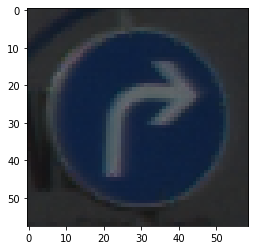

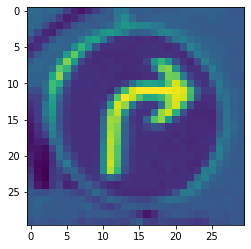

In [14]:
plt.imshow(originalImage); 
plt.show()
plt.imshow(processedImage); 
plt.show()

In [15]:
data = np.array(data)
labels = np.array(labels)

print(labels)
print('end')

[ 0  0  0 ... 42 42 42]
end


In [16]:
#os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

print("end")

end


In [17]:
#load data 
data= np.load('./training/data.npy')
labels= np.load('./training/target.npy')

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)

print('Train min=%.3f, max=%.3f' % (X_train.min(), X_train.max()))
print('Test min=%.3f, max=%.3f' % (X_test.min(), X_test.max()))

# Normalize value to [0, 1]
X_train = X_train/255
X_test = X_test/255

print('Train min=%.3f, max=%.3f' % (X_train.min(), X_train.max()))
print('Test min=%.3f, max=%.3f' % (X_test.min(), X_test.max()))

print("end")

(31367, 30, 30, 2) (7842, 30, 30, 2) (31367,) (7842,)
Train min=0.000, max=255.000
Test min=3.000, max=255.000
Train min=0.000, max=1.000
Test min=0.012, max=1.000
end


In [18]:
#Provide a Basic Summary of the Data Set:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_test)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
unique_rows = np.unique(Y_train, axis=0)
unique_columns = np.unique(Y_train, axis=1)
n_classes = len(unique_rows)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 7842
Image data shape = (30, 30, 2)
Number of classes = 43


In [19]:
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train)
print("Updated Train Image Shape: {}".format(X_train[0].shape))

# Set numeric type to float32 from uint8
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


Updated Train Image Shape: (30, 30, 2)


In [20]:
##----------------------------LeNet-5 CNN--------------------------
from keras.models import Sequential
import keras

model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))

# S2 Pooling Layer
model.add(MaxPool2D(pool_size=(4, 4),strides=(2, 2)))

# C3 Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# S4 Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# S5 Flatten
model.add(Flatten())

# Flattening the 2D arrays for fully connected layers

# FC6 Fully Connected Layer
model.add(Dense(120, activation='relu'))

# FC6 Fully Connected Layer
model.add(Dense(84, activation='relu'))

#Output Layer with softmax activation
model.add(Dense(43, activation='softmax'))

model.summary()

print("end Model")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        1632      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               192120    
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("end compile Model 2")

end compile Model 2


In [22]:
##more accuracy
epochs = 20
batch_size=32
history = model.fit(X_train, Y_train, batch_size, epochs=epochs, validation_data=(X_test, Y_test))

print("end epoch" )

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 31s 1ms/step - loss: 2.1262 - accuracy: 0.4087 - val_loss: 0.7622 - val_accuracy: 0.7751
Epoch 2/20
31367/31367 [==============================] - 30s 950us/step - loss: 0.4719 - accuracy: 0.8631 - val_loss: 0.3489 - val_accuracy: 0.9045
Epoch 3/20
31367/31367 [==============================] - 28s 903us/step - loss: 0.2454 - accuracy: 0.9313 - val_loss: 0.2355 - val_accuracy: 0.9328
Epoch 4/20
31367/31367 [==============================] - 27s 852us/step - loss: 0.1569 - accuracy: 0.9551 - val_loss: 0.1659 - val_accuracy: 0.9552
Epoch 5/20
31367/31367 [==============================] - 29s 914us/step - loss: 0.1188 - accuracy: 0.9666 - val_loss: 0.1428 - val_accuracy: 0.9601
Epoch 6/20
31367/31367 [==============================] - 29s 912us/step - loss: 0.0995 - accuracy: 0.9712 - val_loss: 0.1265 - val_accuracy: 0.9671
Epoch 7/20
31367/31367 [==============================] - 2

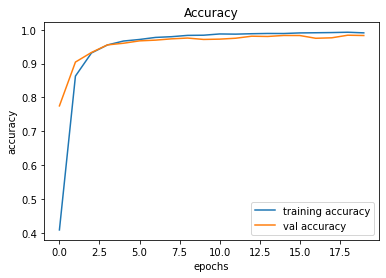

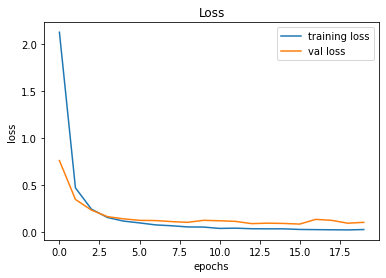

end show


In [23]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

print("end show" )

In [24]:
model.save("./training/TSR.h5")

In [25]:
##TESTING DATA
def testing(testcsv):
    Y_test = pd.read_csv(testcsv)
    label = Y_test["ClassId"].values
    imgs = Y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img).convert('LA')
        image = image.resize((30,30))
        ##print(image)
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

X_test, label = testing('Test.csv')

Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9121931908155186


In [27]:
model.save("./training/TSR.h5")

In [28]:
import os
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [29]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img).convert('LA')
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Speed limit (70km/h)


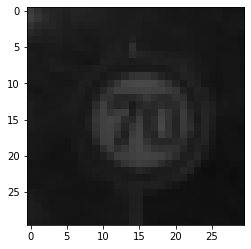

In [31]:
plot,prediction = test_on_img(cur_path + "\\Test\\" + "00020.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()